<a href="https://colab.research.google.com/github/rahamath10/emotions-detecting-using-dl-model/blob/main/Deep_Learning%E2%80%93Based_Facial_Emotion_Detection_Using_CNN_on_FER2013_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1.Upload Kaggle API Key**

In [3]:
from google.colab import files
files.upload()   # Upload kaggle.json


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rahamathsameema","key":"f6380610800086c9ceb29e71bd1ad36e"}'}

##**2.Setup Kaggle Configuration**

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


##**3.Download FER2013 Dataset**

In [5]:
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.17GB/s]


##**4.Unzip Dataset**

In [6]:
!unzip fer2013.zip -d fer2013


Streaming output truncated to the last 5000 lines.
  inflating: fer2013/train/sad/Training_65242339.jpg  
  inflating: fer2013/train/sad/Training_65267116.jpg  
  inflating: fer2013/train/sad/Training_65275626.jpg  
  inflating: fer2013/train/sad/Training_6529266.jpg  
  inflating: fer2013/train/sad/Training_65329617.jpg  
  inflating: fer2013/train/sad/Training_65338712.jpg  
  inflating: fer2013/train/sad/Training_65338797.jpg  
  inflating: fer2013/train/sad/Training_65387162.jpg  
  inflating: fer2013/train/sad/Training_65404494.jpg  
  inflating: fer2013/train/sad/Training_65426218.jpg  
  inflating: fer2013/train/sad/Training_65430136.jpg  
  inflating: fer2013/train/sad/Training_65437377.jpg  
  inflating: fer2013/train/sad/Training_6545735.jpg  
  inflating: fer2013/train/sad/Training_65463385.jpg  
  inflating: fer2013/train/sad/Training_65473985.jpg  
  inflating: fer2013/train/sad/Training_65502829.jpg  
  inflating: fer2013/train/sad/Training_65505359.jpg  
  inflating: fer

##**5.Check Dataset Structure**

In [7]:
import os

print(os.listdir('/content/fer2013'))
print(os.listdir('/content/fer2013/train'))
print(os.listdir('/content/fer2013/test'))


['train', 'test']
['disgust', 'surprise', 'angry', 'happy', 'neutral', 'fear', 'sad']
['disgust', 'surprise', 'angry', 'happy', 'neutral', 'fear', 'sad']


##**6.Import Required Libraries**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


##**7.Define Dataset Paths**

In [9]:
train_dir = '/content/fer2013/train'
test_dir = '/content/fer2013/test'


##**8.Data Preprocessing & Augmentation**

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


##**9.Create Data Generators**

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


##**10.Build CNN Model**

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##**11.Compile Model**

In [13]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


##**12.Train Model**

In [14]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 120s 264ms/step - accuracy: 0.2279 - loss: 1.8565 - val_accuracy: 0.2502 - val_loss: 1.8070
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 116s 257ms/step - accuracy: 0.2431 - loss: 1.8164 - val_accuracy: 0.2601 - val_loss: 1.7800
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 115s 257ms/step - accuracy: 0.2546 - loss: 1.7984 - val_accuracy: 0.2747 - val_loss: 1.7641
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 116s 258ms/step - accuracy: 0.2518 - loss: 1.7875 - val_accuracy: 0.2881 - val_loss: 1.7550
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 117s 260ms/step - accuracy: 0.2546 - loss: 1.7855 - val_accuracy: 0.2803 - val_loss: 1.7371
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 117s 260ms/step - accuracy: 0.2648 - loss: 1.7800 - val_accuracy: 0.3157 - val_loss: 1.7324
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 117s 259ms/step - accuracy: 0.2733 - loss: 1.7638 - val_accuracy: 0.3370 - val_loss: 1.7086
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 117s 261ms/step - accuracy: 0.2798 -

##**13.Save Trained Model**

In [15]:
model.save('emotion_detection_cnn.h5')


##**14.Evaluate Model**

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.4342 - loss: 1.4472
Test Accuracy: 43.72%


##**15.Plot Accuracy Graph**

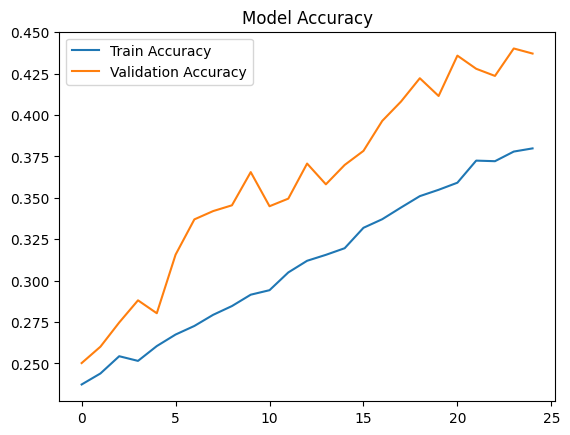

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


##**16.Plot Loss Graph**

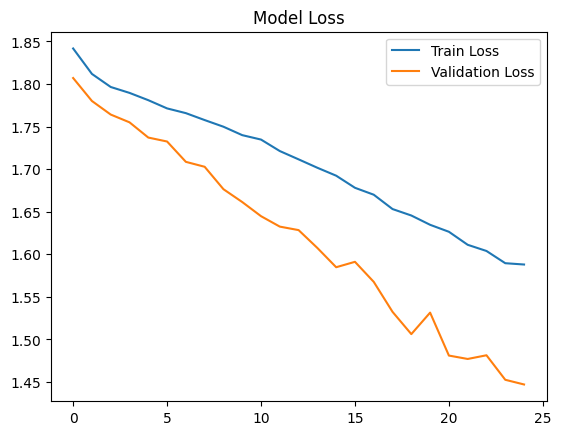

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


##**17.Check Sample Test Images**

In [19]:
import os
print(os.listdir('/content/fer2013/test/happy'))


['PrivateTest_48134791.jpg', 'PublicTest_38668874.jpg', 'PrivateTest_2626531.jpg', 'PublicTest_57757862.jpg', 'PublicTest_89784089.jpg', 'PrivateTest_80833405.jpg', 'PrivateTest_32698156.jpg', 'PrivateTest_68191465.jpg', 'PrivateTest_60253779.jpg', 'PrivateTest_34792598.jpg', 'PublicTest_92936239.jpg', 'PublicTest_27625077.jpg', 'PublicTest_70446845.jpg', 'PrivateTest_52523736.jpg', 'PrivateTest_3362951.jpg', 'PrivateTest_65761852.jpg', 'PrivateTest_5841098.jpg', 'PrivateTest_57908813.jpg', 'PrivateTest_76716282.jpg', 'PrivateTest_33247259.jpg', 'PublicTest_30247797.jpg', 'PublicTest_77496236.jpg', 'PublicTest_86983790.jpg', 'PublicTest_11394394.jpg', 'PrivateTest_75600645.jpg', 'PrivateTest_26683191.jpg', 'PrivateTest_27144786.jpg', 'PrivateTest_59445774.jpg', 'PrivateTest_90922733.jpg', 'PublicTest_42722923.jpg', 'PrivateTest_82138406.jpg', 'PrivateTest_94125534.jpg', 'PrivateTest_48951404.jpg', 'PublicTest_71618622.jpg', 'PublicTest_18496904.jpg', 'PrivateTest_55512604.jpg', 'Privat

##**18.Predict Emotion for One Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


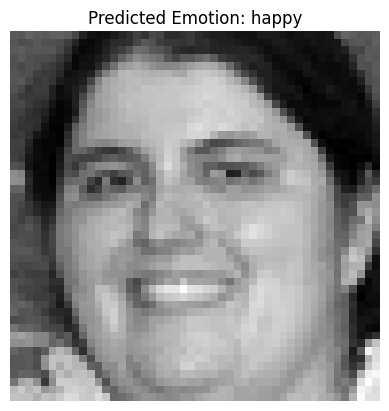

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/fer2013/test/happy/PrivateTest_48134791.jpg' # Changed to an existing image file
img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_emotion = list(train_generator.class_indices.keys())[np.argmax(prediction)]

plt.imshow(img_array[0].reshape(48,48), cmap='gray')
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off')
plt.show()